This dataset contains a list of electronic games with sales exceeding 100,000 copies. 
Please clean it and identify factors such as genre, platform, release year, and publishing company that affect the sales of each game.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
#xử lý null

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
selected_records = df[df['Year'].isnull()]
print(selected_records.head())

     Rank                        Name Platform  Year     Genre  \
179   180             Madden NFL 2004      PS2   NaN    Sports   
377   378            FIFA Soccer 2004      PS2   NaN    Sports   
431   432  LEGO Batman: The Videogame      Wii   NaN    Action   
470   471  wwe Smackdown vs. Raw 2006      PS2   NaN  Fighting   
607   608              Space Invaders     2600   NaN   Shooter   

                                  Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                         Electronic Arts      4.26      0.26      0.01   
377                         Electronic Arts      0.59      2.36      0.04   
431  Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                     NaN      1.57      1.02      0.00   
607                                   Atari      2.36      0.14      0.00   

     Other_Sales  Global_Sales  
179         0.71          5.23  
377         0.51          3.49  
431         0.29          3.17  
470     

In [9]:
df.Year.fillna(np.float64(2006),inplace=True)

In [10]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
selected_records = df[df['Publisher'].isnull()]
print(selected_records.head())

      Rank                                               Name Platform  \
470    471                         wwe Smackdown vs. Raw 2006      PS2   
1303  1305                                     Triple Play 99       PS   
1662  1664       Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA   
2222  2224                                 Bentley's Hackpack      GBA   
3159  3161  Nicktoons Collection: Game Boy Advance Video V...      GBA   

        Year     Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
470   2006.0  Fighting       NaN      1.57      1.02       0.0         0.41   
1303  2006.0    Sports       NaN      0.81      0.55       0.0         0.10   
1662  2007.0      Misc       NaN      0.87      0.32       0.0         0.02   
2222  2005.0      Misc       NaN      0.67      0.25       0.0         0.02   
3159  2004.0      Misc       NaN      0.46      0.17       0.0         0.01   

      Global_Sales  
470           3.00  
1303          1.46  
1662          1.2

In [12]:
df.groupby('Publisher').size().sort_values(ascending=False)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Playmates                          1
Playmore                           1
Plenty                             1
Pony Canyon                        1
SCS Software                       1
Length: 578, dtype: int64

In [13]:
df.Publisher.fillna('Electronic Arts',inplace=True)

In [14]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [15]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


In [16]:
#không có trùng lặp

In [17]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


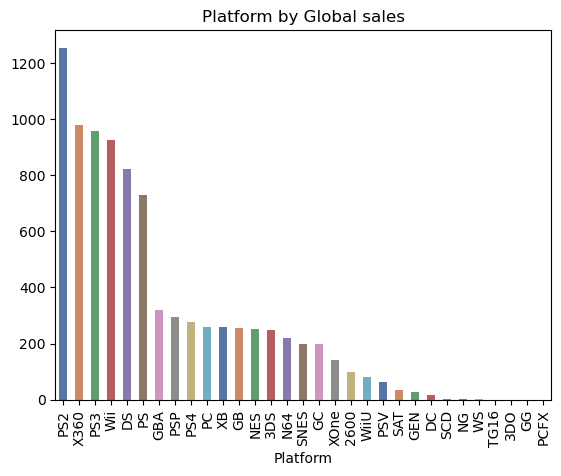

In [29]:
#sns.barplot(data=df,x='Platform',y='Global_Sales',estimator=np.mean,width=1,palette='deep')
total_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
list_total_sales = total_by_platform.values
list_platform = total_by_platform.index
sns.barplot(data=df, x=list_platform, y=list_total_sales, estimator=np.mean, width=0.5, palette='deep', order=total_by_platform.index)
plt.xticks(rotation ='vertical')
plt.title('Platform by Global sales')
plt.show()

In [ ]:
# đa phần người chơi ưa thích chơi tựa game trên nền tảng PS2, X360, PS3, Wii, DS và PS, các nền tảng còn lại thì chiếm số lượng ít hơn 

Text(0, 0.5, 'Total Global Sales')

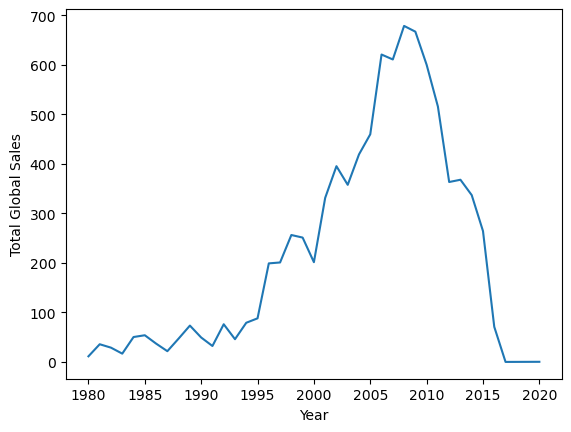

In [50]:
TotalSalesByYear = df.groupby('Year')['Global_Sales'].sum()
List_year=TotalSalesByYear.index
List_TotalSales=TotalSalesByYear.values
plt.plot(List_year, List_TotalSales)
plt.xlabel('Year')
plt.ylabel('Total Global Sales')

In [ ]:
#giai đoạn những năm 2005-2010 là giai đoạn bùng nổ của thị trường game mất phí, sau đó giảm dần, điều này cũng dễ hiểu vì sau giai đoạn năm 2010, thị trường game online miễn phí bùng nổ. Điều này dẫn tới doanh thu của các tựa game kể trên giảm sút đáng kể

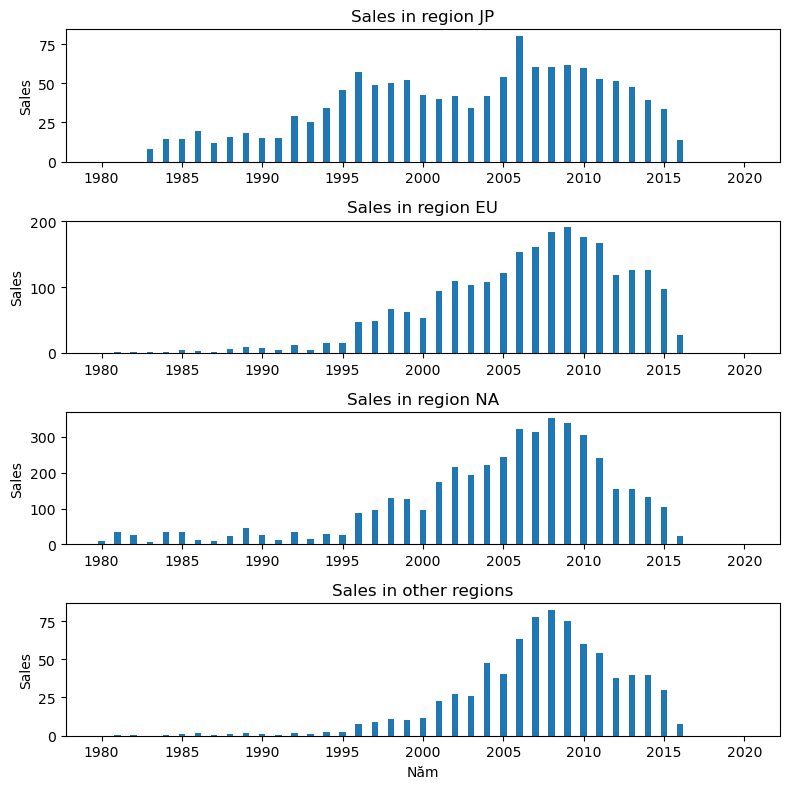

In [46]:
def plot_revenue_by_region(years, revenue_jp, revenue_eu, revenue_na, revenue_other):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))

  
    ax1.bar(years, revenue_jp, width=0.4, align='center')
    ax1.set_ylabel('Sales')
    ax1.set_title('Sales in region JP')


    ax2.bar(years, revenue_eu, width=0.4, align='center')
    ax2.set_ylabel('Sales')
    ax2.set_title('Sales in region EU')


    ax3.bar(years, revenue_na, width=0.4, align='center')
    ax3.set_ylabel('Sales')
    ax3.set_title('Sales in region NA')


    ax4.bar(years, revenue_other, width=0.4, align='center')
    ax4.set_xlabel('Năm')
    ax4.set_ylabel('Sales')
    ax4.set_title('Sales in other regions')

    plt.tight_layout()
    plt.show()


    years = List_year
    revenue_jp = df.groupby('Year')['JP_Sales'].sum()
    revenue_eu = df.groupby('Year')['EU_Sales'].sum()
    revenue_na = df.groupby('Year')['NA_Sales'].sum()
    revenue_other = df.groupby('Year')['Other_Sales'].sum()


plot_revenue_by_region(years, revenue_jp, revenue_eu, revenue_na, revenue_other)

In [ ]:
#thị trường Bắc Mỹ chiếm tỉ trọng lớn trong doanh thu của thị trường game trong giai đoạn này 

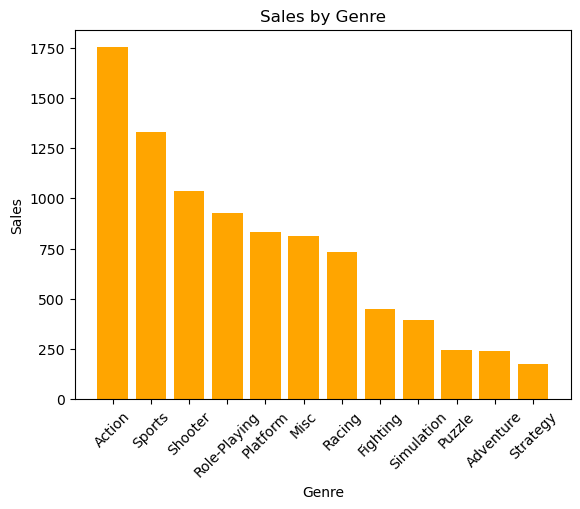

In [52]:
total_revenue_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
Genre=total_revenue_genre.index
Values=total_revenue_genre.values
plt.bar(Genre,Values, color='orange')
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation =45)
plt.show()

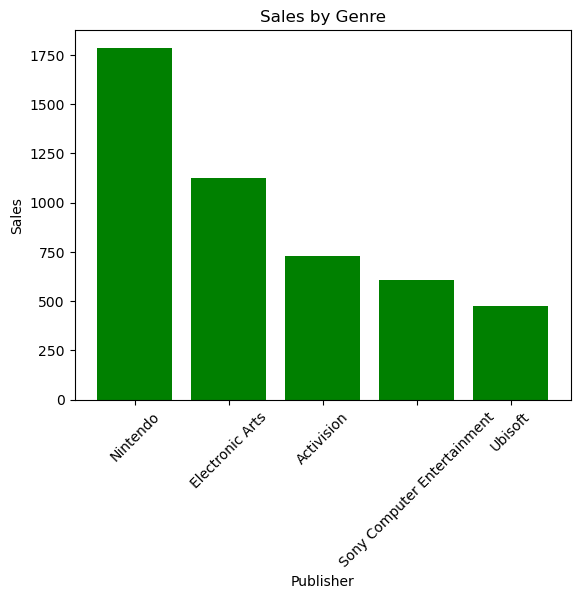

In [63]:
total_revenue_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
sort_top5=total_revenue_publisher.head(5).index
Values=total_revenue_publisher.head(5).values
plt.bar(sort_top5,Values, color='Green')
plt.title('Sales by Genre')
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.xticks(rotation =45)
plt.show()